# Mann-Whitney U Test Criterion

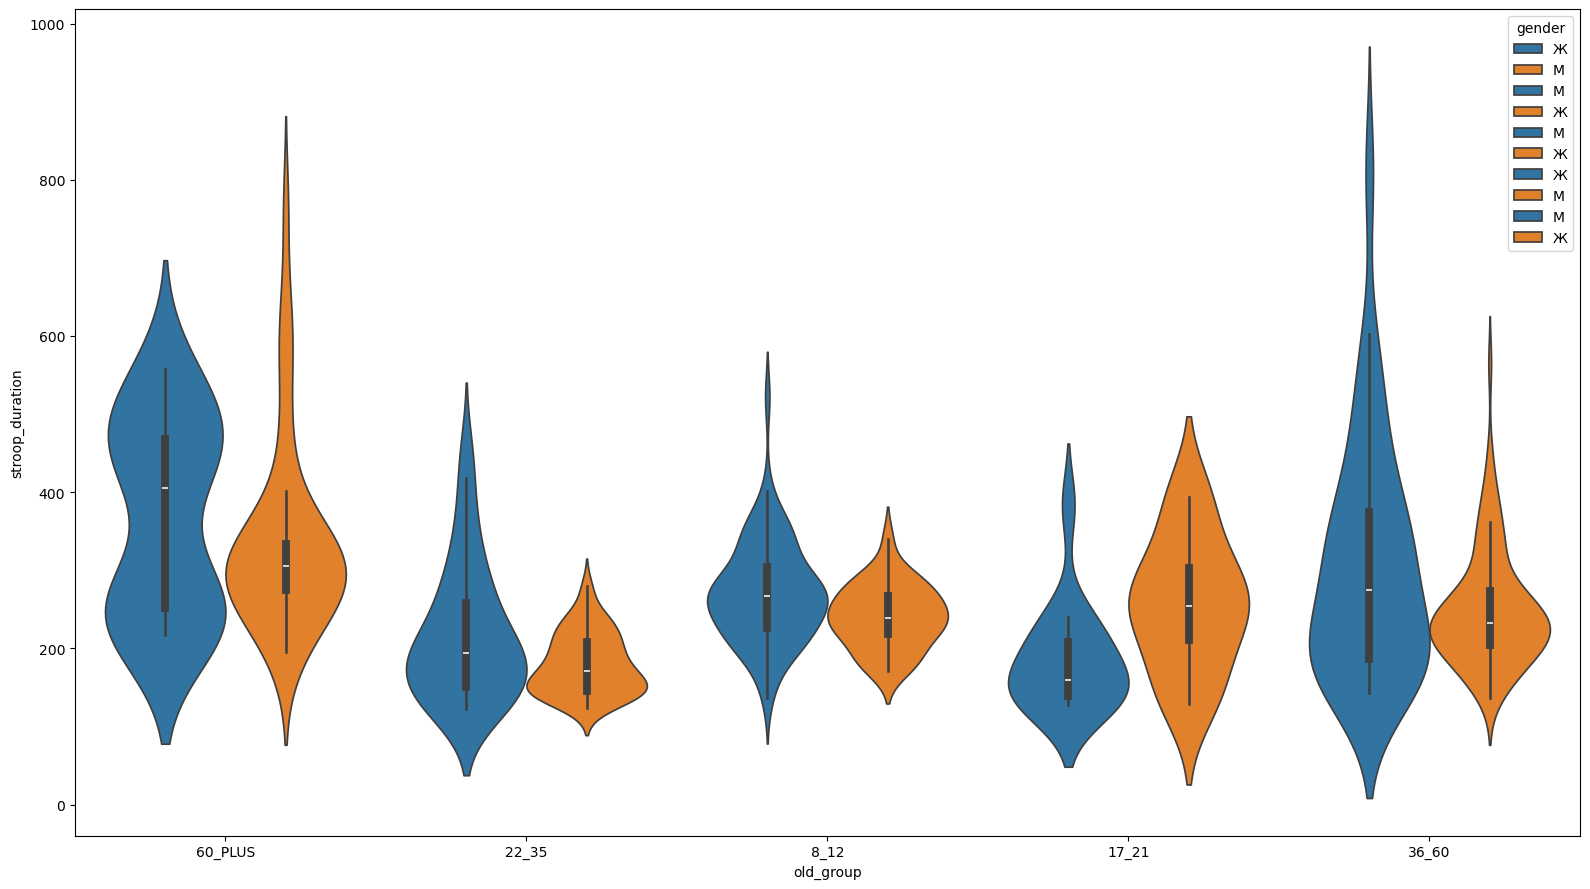

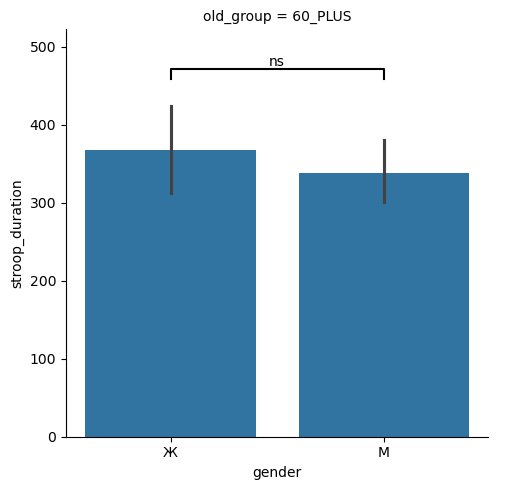

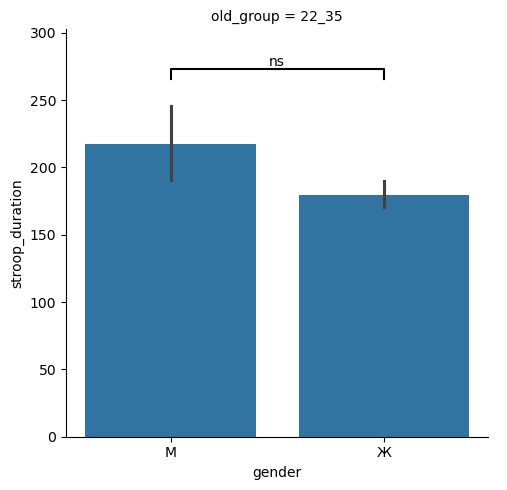

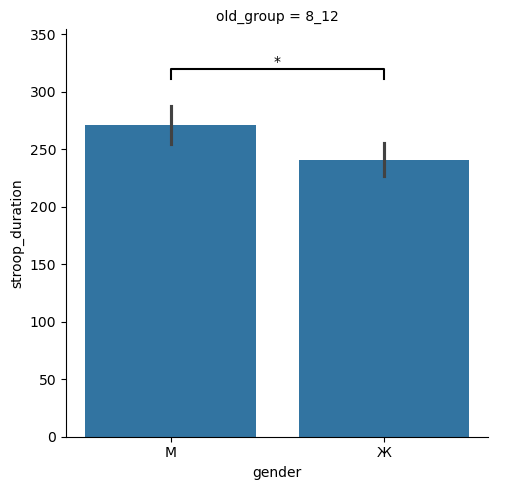

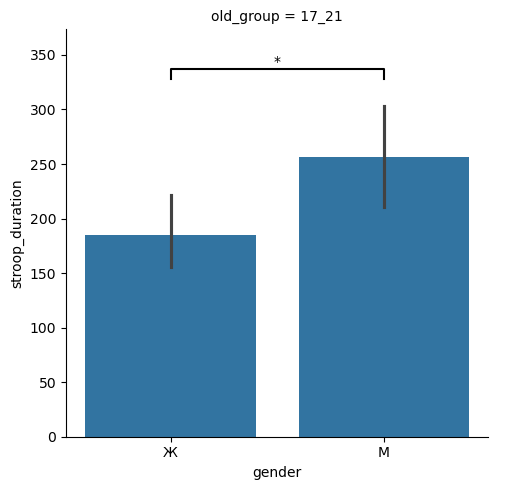

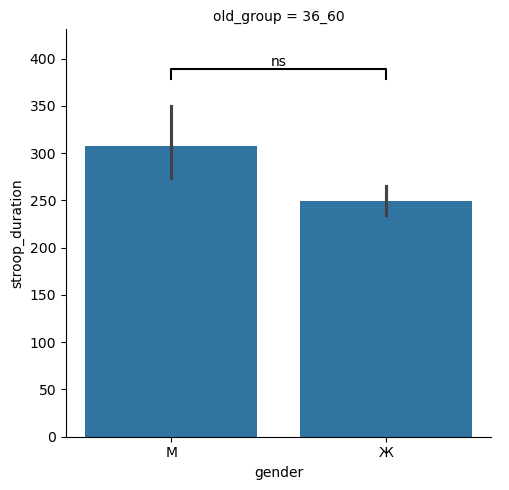

In [102]:
# importting Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
import starbars
wr.filterwarnings('ignore')

#Loading and reading dataset
df = pd.read_excel("dataset_mental_report_new.xlsx")

df.drop(["Unnamed: 0"], axis = 1, inplace = True) #Deleted firts column.


#Calculating Mann-Whitney U for each age group, hue = gender
from scipy.stats import mannwhitneyu 
old_group_values = list(set(df['old_group'].tolist()))
alphas = []
groups_to_remove = []  
annotations = []
for group in old_group_values:
    temp_df = df.loc[df['old_group'] == group]
    x = temp_df.query('gender == "М"')['stroop_duration']
    y = temp_df.query('gender == "Ж"')['stroop_duration']
    
    if (x.empty or y.empty):
        groups_to_remove.append(group)  
        continue
        
    stats, alpha = mannwhitneyu(x, y)
    alphas.append(alpha)
    

for group in groups_to_remove:
    old_group_values.remove(group)


#Plotting results
plt.figure(figsize = (16,9))
for group in old_group_values:
    i = old_group_values.index(group)
    temp_df = df.loc[df['old_group'] == group]
    #plt.subplot(7, 19, i + 1)
    sns.violinplot(data = temp_df, x = 'old_group', y = 'stroop_duration', hue = 'gender')

plt.tight_layout()
plt.show()

annotations = []
for group in old_group_values:
    i = old_group_values.index(group)
    temp_df = df.loc[df['old_group'] == group]
    sns.catplot(temp_df, kind ="bar", x ='gender', y ='stroop_duration', col = 'old_group', )
    annotations = [('М', 'Ж', alphas[i])]
    starbars.draw_annotation(annotations)

plt.tight_layout()
plt.show()